In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
p <- file.path(getwd(),"gplus/")
print(p)

[1] "E:/2018 Spring/232/project2/gplus"


In [3]:
all_files <- list.files(path = p, pattern = ".circles")

In [4]:
count <- 0
for(i in 1:length(all_files)){
    if (file.size(paste0('gplus/',all_files[i])) == 0) next
    f <- read.table(paste0('gplus/',all_files[i]), sep=" ")
    if(nrow(f) > 2){
        count <- count + 1
    }
}
print(length(all_files))
print(count)

[1] 132
[1] 57


In [2]:
file_name <- c("109327480479767108490","115625564993990145546","101373961279443806744")

[1] 1


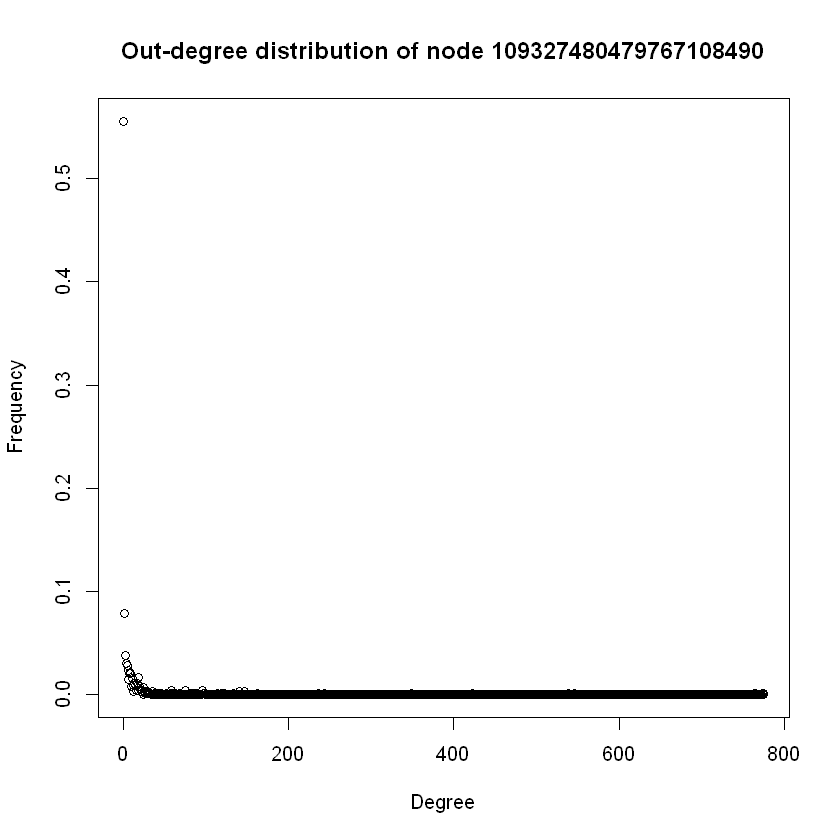

[1] 2


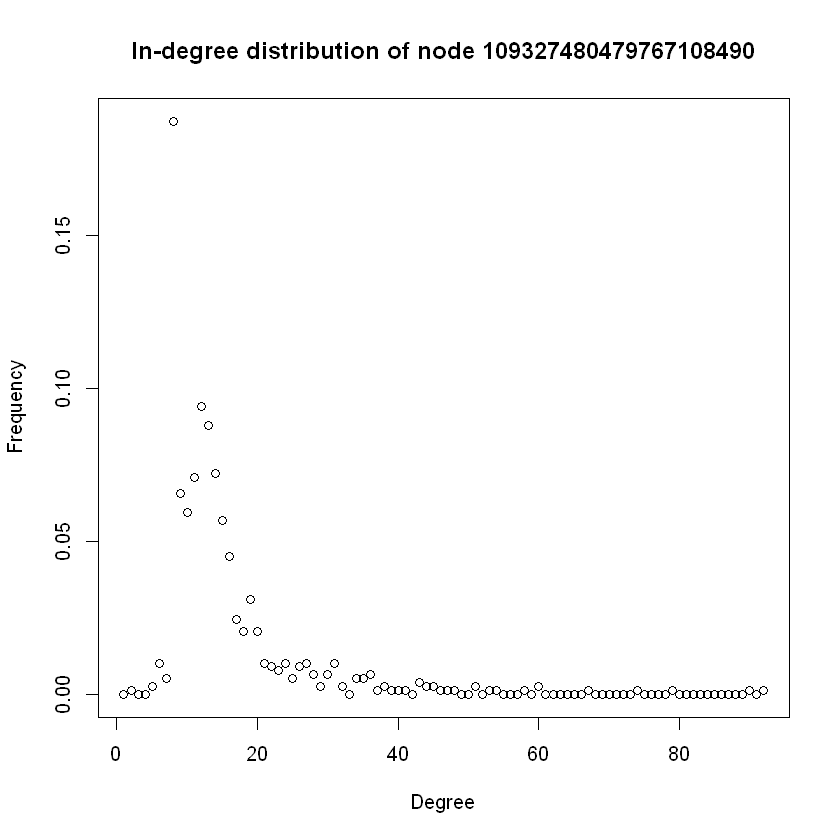

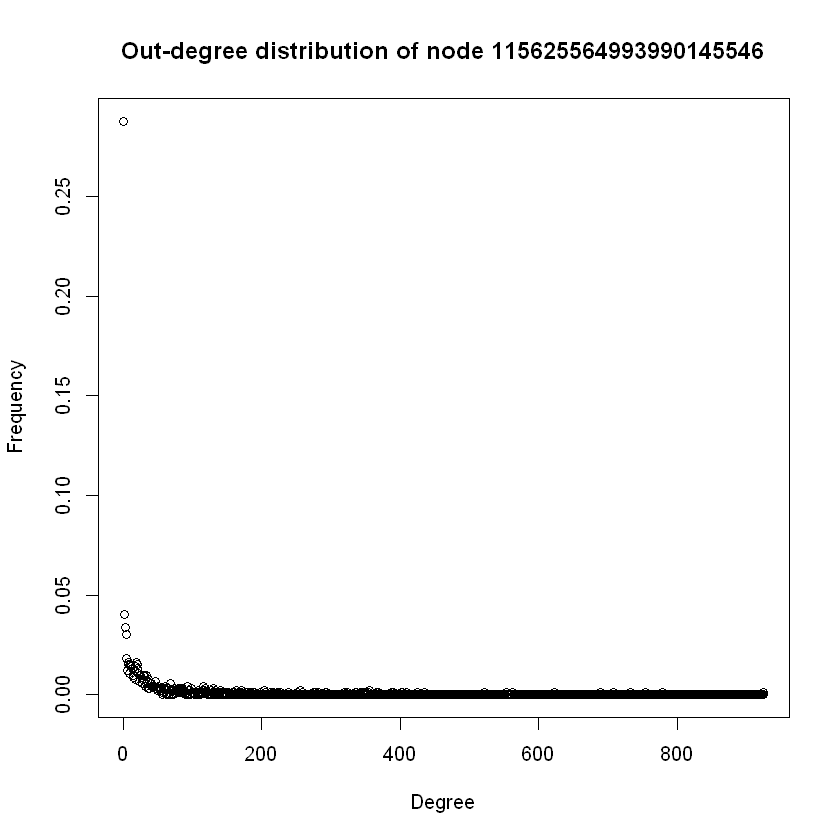

[1] 3


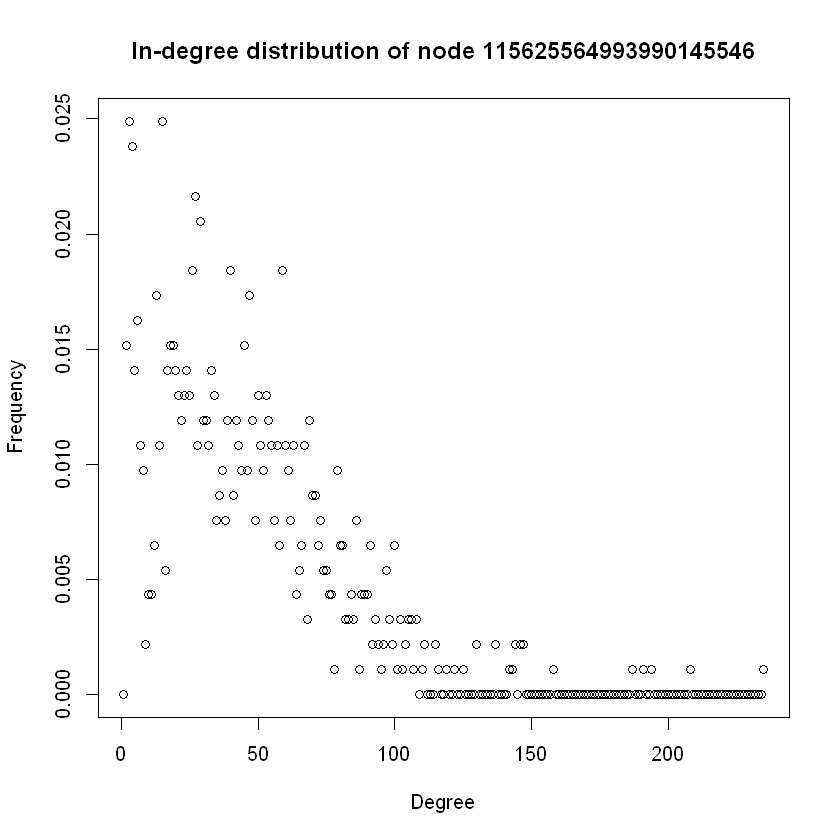

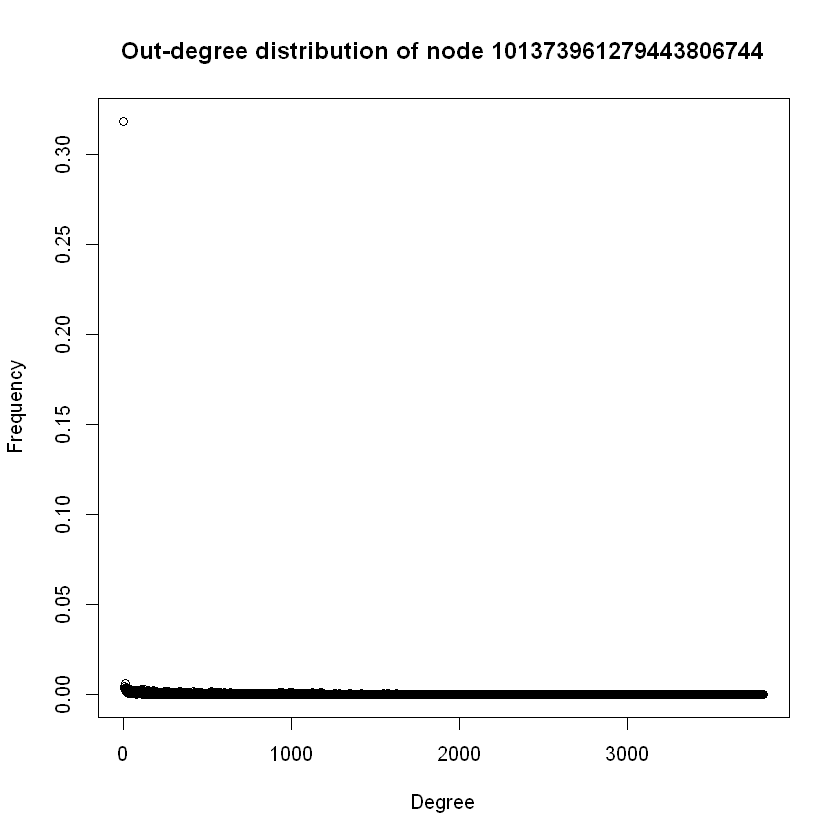

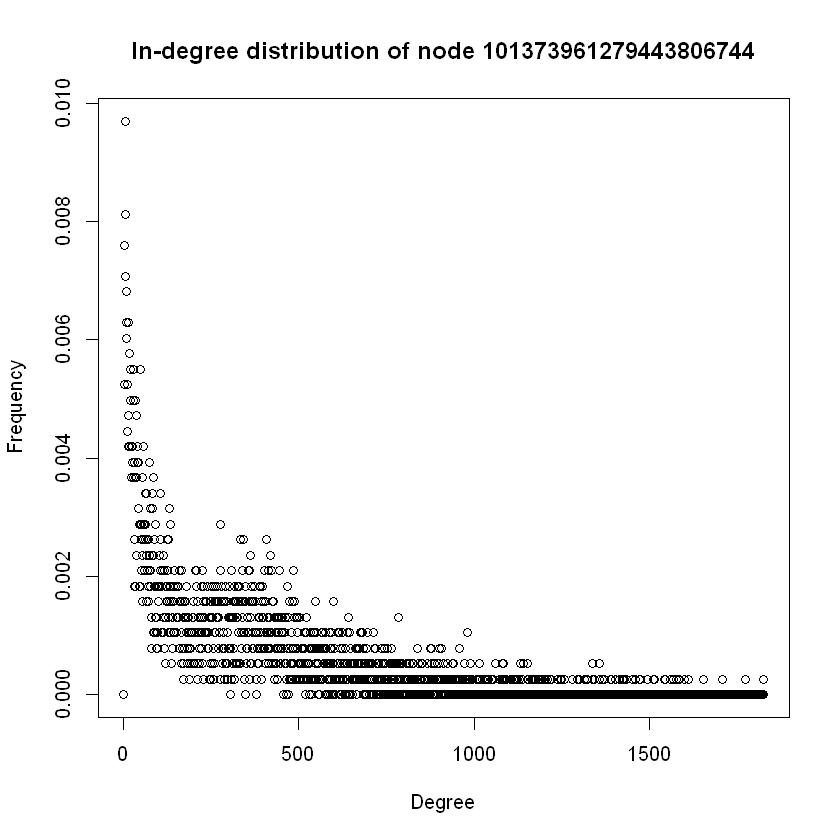

In [7]:
for(i in 1:length(file_name)){
    options(scipen = 999)
    f <- read.table(paste0('gplus/',file_name[i],".edges"), sep = " ")
    g <- graph.data.frame(f, directed=TRUE)
    g <- add_vertices(g, 1, name = file_name[i], color="red")
    vlist <- vertex_attr(g, "name")
    for(j in 1:length(vlist))
        g <- add_edges(g, c(file_name[i], vlist[j]))
    plot(degree.distribution(g,mode="out"),main=paste("Out-degree distribution of node",file_name[i]),xlab="Degree",ylab="Frequency")
    dev.copy2pdf(file = paste("Q19_node",i,"_out.pdf",sep=""))
    plot(degree.distribution(g,mode="in"),main=paste("In-degree distribution of node",file_name[i]),xlab="Degree",ylab="Frequency")
    dev.copy2pdf(file = paste("Q19_node",i,"_in.pdf",sep=""))
}

[1] "node 1 modularity: 0.252787130836454"
[1] "node 1 homogeneity 0.840701754665236"
[1] "node 1 completeness 0.143261916873428"


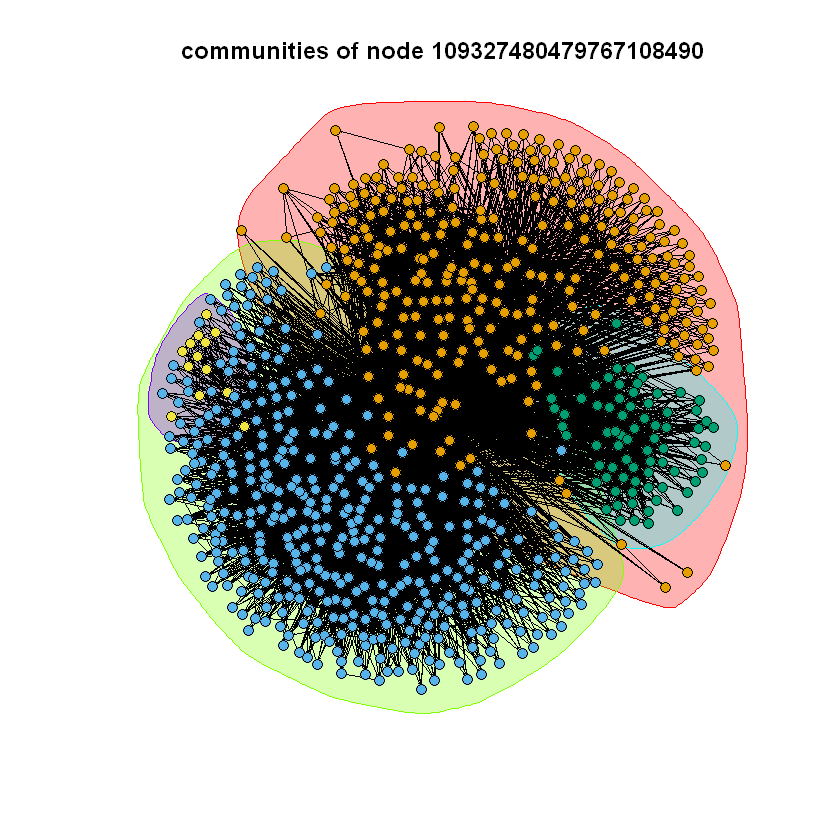

[1] "node 2 modularity: 0.319486693112148"
[1] "node 2 homogeneity 0.565034707846679"
[1] "node 2 completeness -6.11510322369768"


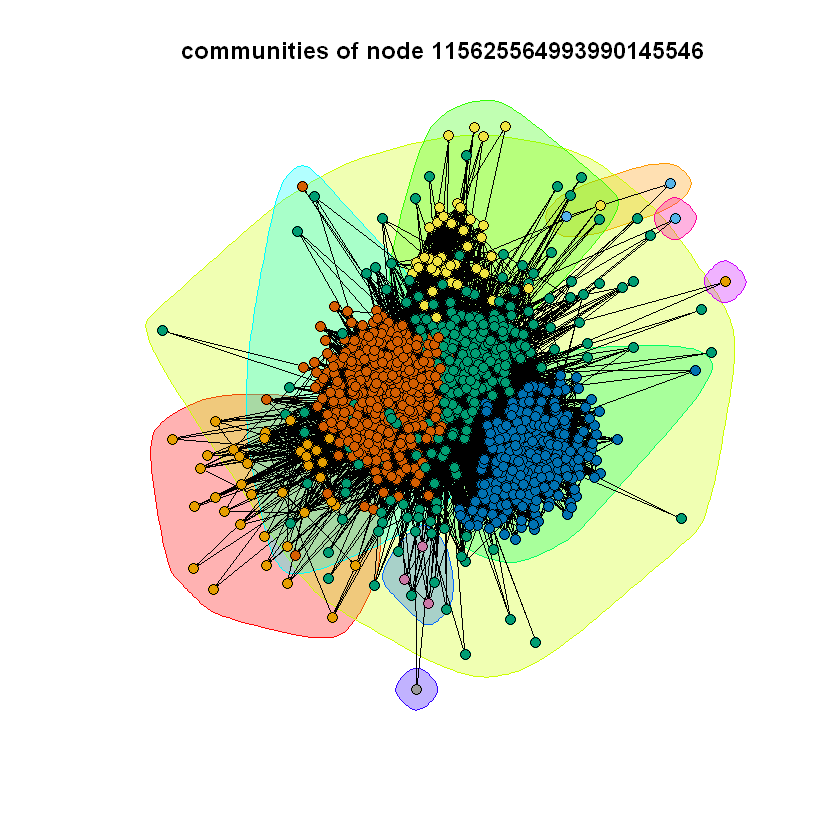

[1] "node 3 modularity: 0.191093274756585"
[1] "node 3 homogeneity -0.365477515770206"
[1] "node 3 completeness -1.74250194791754"


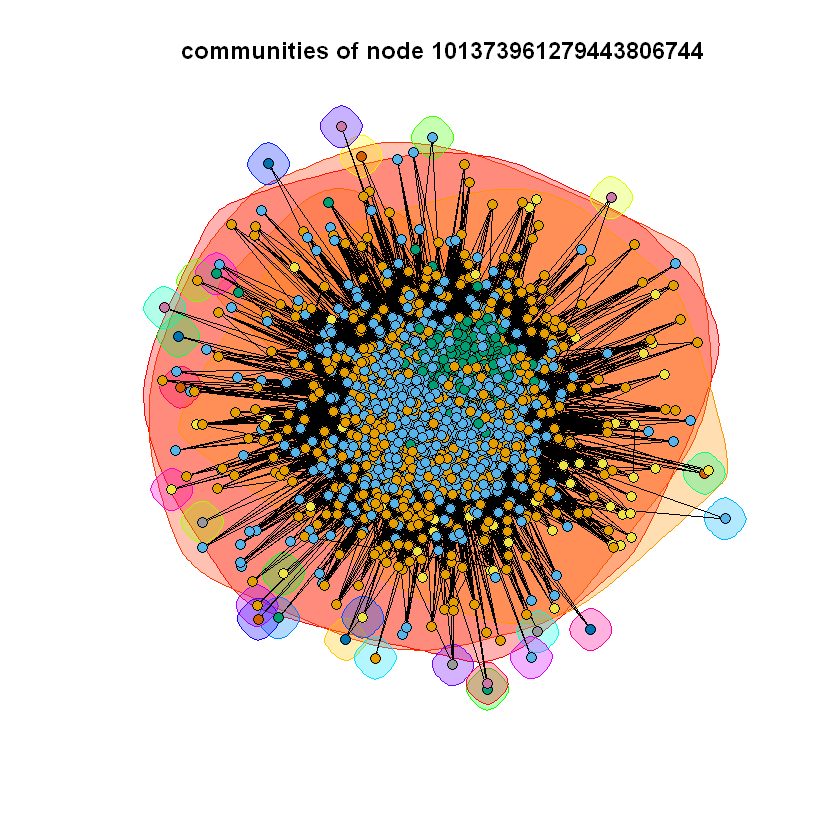

In [36]:
for(i in 1:3){
    #Q20
    options(scipen = 999)
    f <- read.table(paste0('gplus/',file_name[i],".edges"), sep = " ")
    g <- graph.data.frame(f, directed=TRUE)
    g <- add_vertices(g, 1, name = file_name[i], color="red")
    vlist <- vertex_attr(g, "name")
    for(j in 1:length(vlist))
        g <- add_edges(g, c(file_name[i], vlist[j]))
    cm =  walktrap.community(g)
    layout1 = layout.fruchterman.reingold(g)
    plot(cm, g, layout=layout1, vertex.size=4, vertex.label=NA, edge.color="black", edge.arrow.size=0.2, edge.width=0.05, ,main=paste("communities of node",file_name[i]))
    dev.copy2pdf(file = paste("Q18_node",i,"_cm.pdf",sep=""))
    print(paste("node",i,"modularity:",modularity(g, membership(cm)),sep=" "))

        
    #Q22    
    f <- read.table(paste0('gplus/',file_name[i],".circles"), sep = "\t", fill=TRUE)
    circles <- f[-c(1)]
    N = unique(c(unlist(circles), file_name[i]))
    #print(length(N))

    HC <- 0
    HK <- 0
    HCK <- 0
    HKC <- 0
    for(j in 1:length(cm)){
        if(length(intersect(N,cm[[j]]))>0 )
            HK <- HK + (length(intersect(N,cm[[j]]))/length(N)) * log(length(intersect(N,cm[[j]]))/length(N))
    }
        
    for(j in 1:nrow(circles)){
            HC <- HC + (length(circles[j,])/length(N)) * log(length(circles[j,])/length(N))
    }

    HC <- HC*-1
    HK <- HK*-1

    for(j in 1:nrow(circles)){
        a <- length(circles[j,])
        for(k in 1:length(cm)){
            b <- length(intersect(N,cm[[k]]))
            C <- length(intersect(circles[j,],cm[[k]]))
            if(C>0){
                HCK <- HCK + (C/length(N)) * log(C/b)
                HKC <- HKC + (C/length(N)) * log(C/a)
            }
        }
    }
    HCK <- HCK*-1
    HKC <- HKC*-1
    h <- 1 - HCK/HC
    c <- 1 - HKC/HK
    print(paste("node",i,"homogeneity",h,sep=" "))
    print(paste("node",i,"completeness",c,sep=" "))
}
